In [1]:
import sys 
print(sys.version) 

3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]


# 1. 데이터 불러오기 =============================================

In [7]:
import pandas as pd
import numpy as np
data = pd.read_csv("./Child_Abuser_New_Columns_cate.csv", encoding='cp949')
data_c = data

C:\Users\KDJ\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4,23,26,30,32,45,50,88,92) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# 2. 학대 변수 설정 =======================================

## 2-1 학대 변수 ( X : 신고접수 + 누적 신고 변수   , Y : 재학대 혐의 여부 )  

In [8]:
data_c = data
data_c = data_c.dropna(axis=0,subset=['New_재학대혐의여부']) # 재학대 혐의가 nan값 제외
data_c

,개별사건번호,피해아동대상자,학대행위자대상,아동_성별,아동_연령대,아동_내국인여부,아동_최종학력,아동_직업유형,아동_거주상태,아동_친권자유형,...,행특_발달_신체건강,행특_특성없음,행특_기타,행특_파악안됨,학대유형,판단_중복,판단_신체_중복제거,판단_정서_중복제거,판단_성_중복제거,판단_방임_중복제거
1,0804080420141200220001,CASRCP20150110545,CASRCP20150120502,M,NaN,내국인,NaN,NaN,기타,친부모,...,0,1,0,0,"신체,정서",Y,N,N,N,N
7,0806080620141200290001,CASRCP20150110903,CASRCP20150120827,F,NaN,내국인,NaN,NaN,자택,친부모,...,0,0,0,0,신체,N,Y,N,N,N
9,0810010420141200070001,CASRCP20150210146,CASRCP20141221354,F,NaN,내국인,NaN,NaN,자택,친부모,...,0,0,0,0,"신체,정서",Y,N,N,N,N
14,0104010420141200080001,CASRCP20150210367,CASRCP20141221398,F,NaN,내국인,NaN,NaN,월세,친부,...,0,0,0,0,정서,N,N,Y,N,N
18,0102010220141200480001,CASRCP20150111013,CASRCP20150120925,F,NaN,내국인,NaN,NaN,보증금(전세)+월세,친모,...,0,0,0,0,성,N,N,N,Y,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122031,5308530820180165120001,CASRCP20180100319,CASRCP20180100320,M,7~9세,내국인,재학중,초등학교,자택,친부모,...,0,0,0,0,방임,N,N,N,N,Y
122034,5506550620180165980001,CASRCP20180101087,CASRCP20180101089,M,10~12세,내국인,재학중,초등학교,NaN,친부모,...,0,0,0,0,"신체,정서",Y,N,N,N,N
122035,0805080520180100010001,CASRCP20180102176,CASRCP20180102182,M,16~17세,내국인,재학중,고등학교,자택,친부모,...,0,0,0,0,정서,N,N,Y,N,N
122037,5801580120180165450001,CASRCP20180100595,CASRCP20180100597,M,1~3세,내국인,NaN,어린이집,NaN,친모,...,0,1,0,0,"신체,정서",Y,N,N,N,N


##  2-1-2 위험점수를 중점으로 보고 싶을때

In [9]:
#ctrl + / 입력후 실행
data_c = data_c.dropna(axis=0,subset=['아동_위험점수']) # 아동 위험점수 nan값 제외
data_c = data_c.dropna(axis=0,subset=['행위_위험점수']) # 행위자 위험점수 nan값 제외

 ## 독립 변수 설정

In [10]:
# 분석자체에 필요없는 변수 삭제
data_c = data_c.drop(['개별사건번호','피해아동대상자','학대행위자대상','신고_관련키워드',
                     '결과_조치결과일자','New_학대횟수','신고_재신고여부_1','신대_재신고여부','조대_재신고여부_1','신고_재신고유형'],axis=1)

# 더미화한 컬럼 원본삭제 
data_c = data_c.drop(['아동_특성_관찰','아동_주요병력','아동_위험유형','결과_아동조치결과',
                     '결과_행위자조치결과','행위_특성_관찰','행위_주요병력','행위_위험유형'],axis=1)


In [11]:
# 주관적 변수 설정
# 기관 및 장소 삭제
data_c = data_c.drop(['신고_통보경찰소속기','신고_관할지구대','신고_신고접수구분','신고_접수자소속기관',
                     '신고_관할지역ID','신고_재신고센터ID','신고_관리센터ID','신고_관할지역기관I',
                     '신대_재신고센터ID','신대_통계기관','신대_통계관할지역',
                     '조사_관할지역ID_','조사_관할지역기관I','조대_재신고관리기관',
                      
                     '아동_내국인여부','아동_다문화가족',
                      '학대유형','조대_특별관리유형',
                      '아동_보호조치유형','신고_재신고이전접수','신대_재신고이전',
                     '조대_재신고이전사건','판단_학대혐의여부','신고_접수연도','행위_다문화가족'],axis=1)

In [12]:
# 변수와 속성보기
for i in data_c.columns:
    print(i,data_c[i].unique(),'\n')

아동_성별 ['F' 'M' nan] 

아동_연령대 [nan '4~6세' '1~3세' '7~9세' '16~17세' '1세미만' '13~15세' '10~12세'] 

아동_최종학력 ['재학중' nan '초등졸업' '고등중퇴' '무학' '중등중퇴' '중등졸업' '초등중퇴' '고등졸업'] 

아동_직업유형 ['초등학교' nan '어린이집' '중학교' '유치원' '고등학교' '무직' '기타' '단순노무종사자' '서비스 및 판매종사자'
 '사무종사자' '기술공 및 준전문가' '농림어업숙련종사자' '전문가' '장치·기계조작 및 조립 종사자'
 '기능원 및 관련 기능 종사자' '관리자'] 

아동_거주상태 ['자택' '전세' nan '보증금(전세)+월세' '기타' '월세' '보호시설' '영구임대아파트  또는 영구임대주택' '무상'] 

아동_친권자유형 ['친부모' '친모' nan '친부' '양부모' '친권자 없음' '양부' '후견인 없음' '양모'] 

아동_가족유형 ['친부모가정' '친부모가족외형태' nan '대리양육형태' '기타'] 

아동_가구소득구분코 ['200만원이상-250만원미만' nan '100만원이상-150만원미만' '300만원이상' '50만원이상~100만원미만'
 '250만원이상-300만원미만' '150만원이상-200만원미만' '50만원미만'] 

아동_기초생활수급유 ['수급권대상' '비수급권대상' nan] 

신고_접수경로구분코 ['아동보호전문기관일반전화' '112' '상담원 인지신고' '내방' '1366' '방문신고' '일반전화' '타기관통보'
 '아동행복지원' '129' '인터넷' '119' '아동행복지원  상담원인지신고' '기타' '아동행복지원  읍면동인지신고'] 

신고_접수일시 ['2016-12-30 11:20:00' '2016-12-28 11:15:00' '2016-12-28 08:05:00' ...
 '2018-01-01 11:50:00' '2018-01-01 11:39:00' '2018-01-01 00:40:00'] 

신고_신고자유형구분 

In [13]:
# 변수 전체 이름보기
data_c.columns

Index(['아동_성별', '아동_연령대', '아동_최종학력', '아동_직업유형', '아동_거주상태', '아동_친권자유형',
       '아동_가족유형', '아동_가구소득구분코', '아동_기초생활수급유', '신고_접수경로구분코', '신고_접수일시',
       '신고_신고자유형구분', '신고_집단시설내사건', '신고_접수유형', '신고_피해아동상태구', '신대_행위자아동관계',
       '신대_아동동거여부', '신대_접수유형', '신대_재신고유형_1', '신대_통계거점', '조사_집단시설내사건',
       '조사_조사완료여부', '아동_위험점수', '조대_재신고유형구분', '조대_동일신고여부', '조대_아동동거여부',
       '판단_학대발생빈도', '아조_기타', '아조_원가정보호', '아조_가정복귀', '아조_사망', '아조_분리조치',
       '행조_아동과의분리', '행조_고소고발사건처', '행조_모니터링', '행조_만나지못함', '행조_사건처리만못함', '행위_성별',
       '행위_연령대', '행위_내국인여부', '행위_최종학력', '행위_직업유형', '행위_거주상태', '행위_친권자유형',
       '행위_가족유형', '행위_가구소득구분코', '행위_기초생활수급유', '행위_위험점수', '다중학대행위자',
       'New_재학대혐의여부', 'New_신고_신고일수', 'New_조치_신고일수', '아특_장애', '아특_정서_정신건강',
       '아특_적응_행동', '아특_발달_신체건강', '아특_특성없음', '아특_기타', '아특_파악안됨', '행특_장애',
       '행특_정서_정신건강', '행특_적응_행동', '행특_발달_신체건강', '행특_특성없음', '행특_기타', '행특_파악안됨',
       '판단_중복', '판단_신체_중복제거', '판단_정서_중복제거', '판단_성_중복제거', '판단_방임_중복제거'],
      dtype='object')

In [14]:
# 더미화 시킨 컬럼들을 제외하고 남은 변수들을 컬럼화하기위한 작업
# 아동 행위자 특성 컬럼
data_c1 = data_c[['아특_장애', '아특_정서_정신건강', '아특_적응_행동',
       '아특_발달_신체건강', '아특_특성없음', '아특_기타', '아특_파악안됨', '행특_장애', '행특_정서_정신건강',
       '행특_적응_행동', '행특_발달_신체건강', '행특_특성없음', '행특_기타', '행특_파악안됨']] 

# 아동 행위자 조치 결과 컴럼
data_c2 = data_c[['아조_기타', '아조_원가정보호', '아조_가정복귀', '아조_사망',
       '아조_분리조치', '행조_아동과의분리', '행조_고소고발사건처', '행조_모니터링', '행조_만나지못함',
       '행조_사건처리만못함']] 

In [15]:
# 아동,행위자 의 특성 및 조치결과 컴럼 합침
dum_lst = list(data_c1.columns) + list(data_c2.columns )
dum_lst

['아특_장애',
 '아특_정서_정신건강',
 '아특_적응_행동',
 '아특_발달_신체건강',
 '아특_특성없음',
 '아특_기타',
 '아특_파악안됨',
 '행특_장애',
 '행특_정서_정신건강',
 '행특_적응_행동',
 '행특_발달_신체건강',
 '행특_특성없음',
 '행특_기타',
 '행특_파악안됨',
 '아조_기타',
 '아조_원가정보호',
 '아조_가정복귀',
 '아조_사망',
 '아조_분리조치',
 '행조_아동과의분리',
 '행조_고소고발사건처',
 '행조_모니터링',
 '행조_만나지못함',
 '행조_사건처리만못함']

In [16]:
# 더미화 한 컴럼 제외시키기
data1 = data_c.drop(dum_lst,axis=1)
data1

,아동_성별,아동_연령대,아동_최종학력,아동_직업유형,아동_거주상태,아동_친권자유형,아동_가족유형,아동_가구소득구분코,아동_기초생활수급유,신고_접수경로구분코,...,행위_위험점수,다중학대행위자,New_재학대혐의여부,New_신고_신고일수,New_조치_신고일수,판단_중복,판단_신체_중복제거,판단_정서_중복제거,판단_성_중복제거,판단_방임_중복제거
31737,F,NaN,재학중,초등학교,자택,친부모,친부모가정,200만원이상-250만원미만,수급권대상,아동보호전문기관일반전화,...,2.0,NaN,N,NaN,NaN,N,N,N,N,Y
31739,M,NaN,NaN,NaN,자택,친부모,친부모가정,200만원이상-250만원미만,수급권대상,아동보호전문기관일반전화,...,2.0,NaN,N,NaN,NaN,N,N,N,N,Y
31940,M,NaN,NaN,NaN,전세,친모,친부모가족외형태,NaN,비수급권대상,112,...,2.0,NaN,Y,2년 ~ 3년 사이,1년 ~ 2년 사이,Y,N,N,N,N
31941,M,NaN,NaN,NaN,NaN,친모,친부모가족외형태,NaN,NaN,112,...,2.0,NaN,N,NaN,NaN,Y,N,N,N,N
31951,F,NaN,NaN,NaN,NaN,친부모,친부모가정,NaN,NaN,112,...,1.0,NaN,N,NaN,NaN,N,N,Y,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122030,F,7~9세,재학중,초등학교,자택,친부,친부모가족외형태,300만원이상,비수급권대상,타기관통보,...,1.0,NaN,N,NaN,NaN,Y,N,N,N,N
122031,M,7~9세,재학중,초등학교,자택,친부모,친부모가족외형태,NaN,비수급권대상,112,...,4.0,NaN,N,NaN,NaN,N,N,N,N,Y
122034,M,10~12세,재학중,초등학교,NaN,친부모,친부모가정,NaN,NaN,112,...,2.0,NaN,N,NaN,NaN,Y,N,N,N,N
122035,M,16~17세,재학중,고등학교,자택,친부모,친부모가정,NaN,비수급권대상,아동보호전문기관일반전화,...,2.0,NaN,N,NaN,NaN,N,N,Y,N,N


In [17]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25807 entries, 31737 to 122038
Data columns (total 47 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   아동_성별        25785 non-null  object 
 1   아동_연령대       13697 non-null  object 
 2   아동_최종학력      18959 non-null  object 
 3   아동_직업유형      18396 non-null  object 
 4   아동_거주상태      10346 non-null  object 
 5   아동_친권자유형     24413 non-null  object 
 6   아동_가족유형      24690 non-null  object 
 7   아동_가구소득구분코   7728 non-null   object 
 8   아동_기초생활수급유   15480 non-null  object 
 9   신고_접수경로구분코   25807 non-null  object 
 10  신고_접수일시      25807 non-null  object 
 11  신고_신고자유형구분   25807 non-null  object 
 12  신고_집단시설내사건   25625 non-null  object 
 13  신고_접수유형      25807 non-null  object 
 14  신고_피해아동상태구   15039 non-null  object 
 15  신대_행위자아동관계   25401 non-null  object 
 16  신대_아동동거여부    24759 non-null  object 
 17  신대_접수유형      25807 non-null  object 
 18  신대_재신고유형_1   2845 non-null   object 
 19 

In [18]:
# n =df.판단_학대혐의여부[2671]
# 더미화를 위해 칼럼의 속성들을 문자형으로 변환
for i in data1.columns:
    data1[i]=data1[i].astype(str)

In [19]:
data1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 25807 entries, 31737 to 122038
Data columns (total 47 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   아동_성별        25807 non-null  object
 1   아동_연령대       25807 non-null  object
 2   아동_최종학력      25807 non-null  object
 3   아동_직업유형      25807 non-null  object
 4   아동_거주상태      25807 non-null  object
 5   아동_친권자유형     25807 non-null  object
 6   아동_가족유형      25807 non-null  object
 7   아동_가구소득구분코   25807 non-null  object
 8   아동_기초생활수급유   25807 non-null  object
 9   신고_접수경로구분코   25807 non-null  object
 10  신고_접수일시      25807 non-null  object
 11  신고_신고자유형구분   25807 non-null  object
 12  신고_집단시설내사건   25807 non-null  object
 13  신고_접수유형      25807 non-null  object
 14  신고_피해아동상태구   25807 non-null  object
 15  신대_행위자아동관계   25807 non-null  object
 16  신대_아동동거여부    25807 non-null  object
 17  신대_접수유형      25807 non-null  object
 18  신대_재신고유형_1   25807 non-null  object
 19  신대_통계거점      25807 n

In [20]:
df = data1
# df = df[df.New_재학대여부_수정 != 'nan']

# 신고접수일에서 연도표시를 위한 연도 추출 후 제거
df_year = df['신고_접수일시'].str[:4]
df = df.drop(['신고_접수일시'],axis=1)

# 추출한 연도를 새로운 컬럼으로 삽입
df_year = df_year.astype(int)
df = pd.concat([df,df_year],axis=1)

In [21]:
df.columns

Index(['아동_성별', '아동_연령대', '아동_최종학력', '아동_직업유형', '아동_거주상태', '아동_친권자유형',
       '아동_가족유형', '아동_가구소득구분코', '아동_기초생활수급유', '신고_접수경로구분코', '신고_신고자유형구분',
       '신고_집단시설내사건', '신고_접수유형', '신고_피해아동상태구', '신대_행위자아동관계', '신대_아동동거여부',
       '신대_접수유형', '신대_재신고유형_1', '신대_통계거점', '조사_집단시설내사건', '조사_조사완료여부',
       '아동_위험점수', '조대_재신고유형구분', '조대_동일신고여부', '조대_아동동거여부', '판단_학대발생빈도', '행위_성별',
       '행위_연령대', '행위_내국인여부', '행위_최종학력', '행위_직업유형', '행위_거주상태', '행위_친권자유형',
       '행위_가족유형', '행위_가구소득구분코', '행위_기초생활수급유', '행위_위험점수', '다중학대행위자',
       'New_재학대혐의여부', 'New_신고_신고일수', 'New_조치_신고일수', '판단_중복', '판단_신체_중복제거',
       '판단_정서_중복제거', '판단_성_중복제거', '판단_방임_중복제거', '신고_접수일시'],
      dtype='object')

## 2-1-1 Y(학대 혐의 여부) 값 1,0 으로 변환

In [22]:
y = df['New_재학대혐의여부']
y.value_counts()

N    19998
Y     5809
Name: New_재학대혐의여부, dtype: int64

## 2-1-2 X : 신고접수 + 누적 신고 변수 저장

In [23]:
X = df.drop(['New_재학대혐의여부'], axis=1)
X.shape


(25807, 46)

# 3. 변수 더미화  ================================================

In [24]:
# 타입에 맞게 y 값지정
y=y.astype(str)

# X 독립변수 더미화
df1 =df.drop(['신고_접수일시','New_재학대혐의여부'],axis=1)

X = pd.get_dummies(X, columns=df1.columns)

# 더미화 시킨 컬럼과 기존 더미화된 컬럼 합치기
X = pd.concat([X, data_c[dum_lst]],axis=1)


X

,신고_접수일시,아동_성별_F,아동_성별_M,아동_성별_nan,아동_연령대_10~12세,아동_연령대_13~15세,아동_연령대_16~17세,아동_연령대_1~3세,아동_연령대_1세미만,아동_연령대_4~6세,...,아조_기타,아조_원가정보호,아조_가정복귀,아조_사망,아조_분리조치,행조_아동과의분리,행조_고소고발사건처,행조_모니터링,행조_만나지못함,행조_사건처리만못함
31737,2016,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
31739,2016,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
31940,2016,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
31941,2016,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
31951,2016,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122030,2018,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
122031,2018,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
122034,2018,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
122035,2018,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [25]:
for i in X.columns:
    print(i)
    

신고_접수일시
아동_성별_F
아동_성별_M
아동_성별_nan
아동_연령대_10~12세
아동_연령대_13~15세
아동_연령대_16~17세
아동_연령대_1~3세
아동_연령대_1세미만
아동_연령대_4~6세
아동_연령대_7~9세
아동_연령대_nan
아동_최종학력_nan
아동_최종학력_고등졸업
아동_최종학력_고등중퇴
아동_최종학력_무학
아동_최종학력_재학중
아동_최종학력_중등졸업
아동_최종학력_중등중퇴
아동_최종학력_초등졸업
아동_최종학력_초등중퇴
아동_직업유형_nan
아동_직업유형_고등학교
아동_직업유형_관리자
아동_직업유형_기능원 및 관련 기능 종사자
아동_직업유형_기술공 및 준전문가
아동_직업유형_기타
아동_직업유형_농림어업숙련종사자
아동_직업유형_단순노무종사자
아동_직업유형_무직
아동_직업유형_사무종사자
아동_직업유형_서비스 및 판매종사자
아동_직업유형_어린이집
아동_직업유형_유치원
아동_직업유형_장치·기계조작 및 조립 종사자
아동_직업유형_전문가
아동_직업유형_중학교
아동_직업유형_초등학교
아동_거주상태_nan
아동_거주상태_기타
아동_거주상태_무상
아동_거주상태_보증금(전세)+월세
아동_거주상태_보호시설
아동_거주상태_영구임대아파트  또는 영구임대주택
아동_거주상태_월세
아동_거주상태_자택
아동_거주상태_전세
아동_친권자유형_nan
아동_친권자유형_양모
아동_친권자유형_양부
아동_친권자유형_양부모
아동_친권자유형_친권자 없음
아동_친권자유형_친모
아동_친권자유형_친부
아동_친권자유형_친부모
아동_친권자유형_후견인 없음
아동_가족유형_nan
아동_가족유형_기타
아동_가족유형_대리양육형태
아동_가족유형_친부모가정
아동_가족유형_친부모가족외형태
아동_가구소득구분코_100만원이상-150만원미만
아동_가구소득구분코_150만원이상-200만원미만
아동_가구소득구분코_200만원이상-250만원미만
아동_가구소득구분코_250만원이상-300만원미만
아동_가구소득구분코_300만원이상
아동_가구소득구분코_50만원미만
아동_가구소득구분코_50만원이상~100만원미만
아동_가구소득구분코

In [26]:
X.columns = X.columns.str.replace('ㆍ','')
X.columns = X.columns.str.replace('·','')
X.columns = X.columns.str.replace('(','')
X.columns = X.columns.str.replace(')','')
X.columns = X.columns.str.replace('+','')
X.columns = X.columns.str.replace('~','')
X.columns = X.columns.str.replace('-','')
X.columns = X.columns.str.replace(',','')

In [27]:
for i in X:
    print(i, X[i].unique())

신고_접수일시 [2016 2017 2018]
아동_성별_F [1 0]
아동_성별_M [0 1]
아동_성별_nan [0 1]
아동_연령대_1012세 [0 1]
아동_연령대_1315세 [0 1]
아동_연령대_1617세 [0 1]
아동_연령대_13세 [0 1]
아동_연령대_1세미만 [0 1]
아동_연령대_46세 [0 1]
아동_연령대_79세 [0 1]
아동_연령대_nan [1 0]
아동_최종학력_nan [0 1]
아동_최종학력_고등졸업 [0 1]
아동_최종학력_고등중퇴 [0 1]
아동_최종학력_무학 [0 1]
아동_최종학력_재학중 [1 0]
아동_최종학력_중등졸업 [0 1]
아동_최종학력_중등중퇴 [0 1]
아동_최종학력_초등졸업 [0 1]
아동_최종학력_초등중퇴 [0 1]
아동_직업유형_nan [0 1]
아동_직업유형_고등학교 [0 1]
아동_직업유형_관리자 [0 1]
아동_직업유형_기능원 및 관련 기능 종사자 [0 1]
아동_직업유형_기술공 및 준전문가 [0 1]
아동_직업유형_기타 [0 1]
아동_직업유형_농림어업숙련종사자 [0 1]
아동_직업유형_단순노무종사자 [0 1]
아동_직업유형_무직 [0 1]
아동_직업유형_사무종사자 [0 1]
아동_직업유형_서비스 및 판매종사자 [0 1]
아동_직업유형_어린이집 [0 1]
아동_직업유형_유치원 [0 1]
아동_직업유형_장치기계조작 및 조립 종사자 [0 1]
아동_직업유형_전문가 [0 1]
아동_직업유형_중학교 [0 1]
아동_직업유형_초등학교 [1 0]
아동_거주상태_nan [0 1]
아동_거주상태_기타 [0 1]
아동_거주상태_무상 [0 1]
아동_거주상태_보증금전세월세 [0 1]
아동_거주상태_보호시설 [0 1]
아동_거주상태_영구임대아파트  또는 영구임대주택 [0 1]
아동_거주상태_월세 [0 1]
아동_거주상태_자택 [1 0]
아동_거주상태_전세 [0 1]
아동_친권자유형_nan [0 1]
아동_친권자유형_양모 [0 1]
아동_친권자유형_양부 [0 1]
아동_친권자유형_양부모 [0 1]
아동_친권자유형_친권자

In [28]:
# 연도별 모델 만들기용 트레이닝 데이터 만들기
X_train = X[(X['신고_접수일시'] == 2014) | (X['신고_접수일시'] == 2015) | (X['신고_접수일시'] == 2016) | (X['신고_접수일시'] == 2017)]
X_train = X_train.drop(['신고_접수일시'],axis=1)
X_train

,아동_성별_F,아동_성별_M,아동_성별_nan,아동_연령대_1012세,아동_연령대_1315세,아동_연령대_1617세,아동_연령대_13세,아동_연령대_1세미만,아동_연령대_46세,아동_연령대_79세,...,아조_기타,아조_원가정보호,아조_가정복귀,아조_사망,아조_분리조치,행조_아동과의분리,행조_고소고발사건처,행조_모니터링,행조_만나지못함,행조_사건처리만못함
31737,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
31739,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
31940,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
31941,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
31951,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88379,0,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
88380,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
88439,0,1,0,1,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,0
88447,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [29]:
# 연도별 모델 만들기용 테스트 데이터 만들기
X_test = X[(X['신고_접수일시'] == 2018)]
X_test = X_test.drop(['신고_접수일시'],axis=1)
X_test

,아동_성별_F,아동_성별_M,아동_성별_nan,아동_연령대_1012세,아동_연령대_1315세,아동_연령대_1617세,아동_연령대_13세,아동_연령대_1세미만,아동_연령대_46세,아동_연령대_79세,...,아조_기타,아조_원가정보호,아조_가정복귀,아조_사망,아조_분리조치,행조_아동과의분리,행조_고소고발사건처,행조_모니터링,행조_만나지못함,행조_사건처리만못함
88477,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
88480,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
88481,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
88482,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
88483,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122030,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
122031,0,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
122034,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
122035,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [30]:
y = df[['New_재학대혐의여부','신고_접수일시']]
y
y.index

Int64Index([ 31737,  31739,  31940,  31941,  31951,  31952,  31976,  31977,
             31980,  31982,
            ...
            122023, 122024, 122026, 122028, 122029, 122030, 122031, 122034,
            122035, 122038],
           dtype='int64', length=25807)

In [31]:
# 재학대 혐의여부 Y,N으로 변환
for i in y.index:
    if (y.loc[i,'New_재학대혐의여부'] == 'Y'):
        y.loc[i,'New_재학대혐의여부'] = 1
    if (y.loc[i,'New_재학대혐의여부'] == 'N'):
        y.loc[i,'New_재학대혐의여부'] = 0

C:\Users\KDJ\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [32]:
y['New_재학대혐의여부'].value_counts()

0    19998
1     5809
Name: New_재학대혐의여부, dtype: int64

In [33]:
y = y.astype(float)

In [34]:
# 검증용 트레이닝 데이터 만들기
y_train = y[(y['신고_접수일시'] == 2014) | (y['신고_접수일시'] == 2015) | (y['신고_접수일시'] == 2016) | (y['신고_접수일시'] == 2017)]
y_train = y_train.drop(['신고_접수일시'],axis=1)

In [35]:
# 검증용 테스트 데이터 만들기
y_test = y[(y['신고_접수일시'] == 2018)]
y_test = y_test.drop(['신고_접수일시'],axis=1)

In [36]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# print(pd.Series(y_train).value_counts())
# print(pd.Series(y_test).value_counts())

(12112, 332)
(12112, 1)
(13695, 332)
(13695, 1)


# 4. train set, test set 연도별 지정==================================

In [37]:
# 재학대 혐의 Y,N의 개수를 반반 맞추게 하기
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import *
X_train,y_train = RandomUnderSampler(random_state = 10).fit_sample(X_train,y_train)

In [38]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# print(pd.Series(y_train).value_counts())
# print(pd.Series(y_test).value_counts())

(5556, 332)
(5556, 1)
(13695, 332)
(13695, 1)


# 5. 데이터 분석하기============================================


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))


## 5-1 catboost


class AccuracyMetric(object):
    def get_final_error(self, error, weight):
        return error / (weight + 1e-38)

    def is_max_optimal(self):
        return True

    def evaluate(self, approxes, target, weight):
        best_class = np.argmax(approxes, axis=0)
        
        accuracy_sum = 0
        weight_sum = 0 

        for i in range(len(target)):
            w = 1.0 if weight is None else weight[i]
            weight_sum += w
            accuracy_sum += w * (best_class[i] == target[i])

        return accuracy_sum, weight_sum

In [40]:
# CatBoost모델 만들기
from catboost import CatBoostClassifier, Pool,cv
from sklearn.metrics import accuracy_score

eval_dataset = Pool(X_test,
                    y_test)


cat_clf = CatBoostClassifier(
    custom_loss=['Accuracy'],
    random_seed=42,
    logging_level='Silent'
)

cat_clf.fit(X_train,
          y_train,
          eval_set=eval_dataset,
          verbose=False)

print(cat_clf.get_best_score())


{'learn': {'Accuracy': 0.9802015838732901, 'Logloss': 0.12943626772155487}, 'validation': {'Accuracy': 0.9033223804308141, 'Logloss': 0.37408288083937286}}


In [41]:
predictions = cat_clf.predict(X_test)
# predictions_probs = model.predict_proba(X_test)
# print(predictions[:20])
# print(predictions_probs[:20])
get_clf_eval(y_test, predictions)

오차행렬:
 [[9386 1278]
 [ 550 2481]]

정확도: 0.8665
정밀도: 0.6600
재현율: 0.8185
F1: 0.7308
AUC: 0.8493


from matplotlib import pyplot

# get importance
importance = cat_clf.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f, col: %s' % (i,v,X_train.columns[i]))

## 5-2 LogisticRegression

In [42]:
# 로지스틱회귀모델 만들기
log_clf = LogisticRegression()
log_clf.fit(X_train,y_train)
cp_list = []
y_list = []
y_pred = log_clf.predict(X_test) # 임계점 0.5 
print("임계점 default(0.5)일 때 정확도 : " ,accuracy_score(y_test, y_pred),"\n") 

for i in range(1,10): # 임계점 0.1부터 0.9 구간까지 측정
    cp = i/10
    cp_list.append(cp)
    
    y_pred = (log_clf.predict_proba(X_test)[:,1] >= cp).astype(bool) # 임계점 0.1 ~ 0.9

    y_list.append(accuracy_score(y_test, y_pred))
    
    print("임계점 %.1f 일때 정확도는 %.6f입니다." %(cp_list[i-1],accuracy_score(y_test, y_pred)))

print("\n가장 정확도가 높은 임계점은 %.1f입니다." %(cp_list[y_list.index(max(y_list))]))


C:\Users\KDJ\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\KDJ\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


임계점 default(0.5)일 때 정확도 :  0.8110989412194232 

임계점 0.1 일때 정확도는 0.337788입니다.
임계점 0.2 일때 정확도는 0.474699입니다.
임계점 0.3 일때 정확도는 0.610807입니다.
임계점 0.4 일때 정확도는 0.725374입니다.
임계점 0.5 일때 정확도는 0.811099입니다.
임계점 0.6 일때 정확도는 0.869514입니다.
임계점 0.7 일때 정확도는 0.904564입니다.
임계점 0.8 일때 정확도는 0.923257입니다.
임계점 0.9 일때 정확도는 0.930194입니다.

가장 정확도가 높은 임계점은 0.9입니다.


In [43]:
y_pred = (log_clf.predict_proba(X_test)[:,1] >= 0.5).astype(bool) # 임계점 0.1 ~ 0.9
get_clf_eval(y_test, y_pred)

오차행렬:
 [[8536 2128]
 [ 459 2572]]

정확도: 0.8111
정밀도: 0.5472
재현율: 0.8486
F1: 0.6654
AUC: 0.8245


In [44]:
from matplotlib import pyplot

# get importance
importance = log_clf.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f, col: %s' % (i,v,X_train.columns[i]))

Feature: 0, Score: 0.48887, col: 아동_성별_F
Feature: 1, Score: 0.41503, col: 아동_성별_M
Feature: 2, Score: -0.67019, col: 아동_성별_nan
Feature: 3, Score: 0.65567, col: 아동_연령대_1012세
Feature: 4, Score: 0.16224, col: 아동_연령대_1315세
Feature: 5, Score: 0.20964, col: 아동_연령대_1617세
Feature: 6, Score: -0.46763, col: 아동_연령대_13세
Feature: 7, Score: -0.13297, col: 아동_연령대_1세미만
Feature: 8, Score: -0.34979, col: 아동_연령대_46세
Feature: 9, Score: 0.11106, col: 아동_연령대_79세
Feature: 10, Score: 0.04549, col: 아동_연령대_nan
Feature: 11, Score: -0.02198, col: 아동_최종학력_nan
Feature: 12, Score: -0.18477, col: 아동_최종학력_고등졸업
Feature: 13, Score: 0.47849, col: 아동_최종학력_고등중퇴
Feature: 14, Score: -0.11693, col: 아동_최종학력_무학
Feature: 15, Score: -0.08024, col: 아동_최종학력_재학중
Feature: 16, Score: 0.61190, col: 아동_최종학력_중등졸업
Feature: 17, Score: -0.55798, col: 아동_최종학력_중등중퇴
Feature: 18, Score: 0.33004, col: 아동_최종학력_초등졸업
Feature: 19, Score: -0.22482, col: 아동_최종학력_초등중퇴
Feature: 20, Score: -0.34253, col: 아동_직업유형_nan
Feature: 21, Score: 0.13810, col: 아동_직업

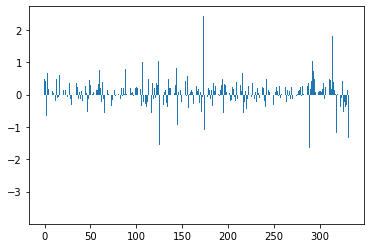

In [45]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## 5-3 Xgboost

In [46]:
X_train.shape

(5556, 332)

In [47]:
epoch = 1000
learning_rate = 0.03
gamma = 0
subsampling = 0.6
max_depth = 5
xgb_model = xgb.XGBRegressor(n_estimators = 100, learning_rate = learning_rate, 
                                 gamma = gamma, subsampling = subsampling,
                                 colsample_bytree = 1, max_depth = max_depth)

print(X_train.shape, y_train.shape)
xgb_model.fit(X_train, y_train)

(5556, 332) (5556, 1)
[00:43:14] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { subsampling } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.03, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             subsampling=0.6, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [48]:
pred_probs = xgb_model.predict(X_test)
# print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
# print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
# print('예측값 10개만 표시: ', preds[:10])

In [49]:
get_clf_eval(y_test, preds)

오차행렬:
 [[9994  670]
 [ 648 2383]]

정확도: 0.9038
정밀도: 0.7805
재현율: 0.7862
F1: 0.7834
AUC: 0.8617


C:\Users\KDJ\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KDJ\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KDJ\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KDJ\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50528 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KDJ\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KDJ\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.

C:\Users\KDJ\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KDJ\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KDJ\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KDJ\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 50528 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KDJ\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KDJ\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.se

C:\Users\KDJ\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KDJ\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KDJ\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 50977 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KDJ\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 48513 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KDJ\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 45796 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KDJ\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 51613 missing from current font.
  font.se

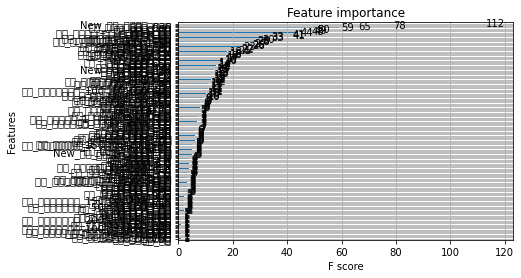

In [50]:
xgb.plot_importance(xgb_model)

## 5-4 Random Forest


In [51]:
forest = RandomForestClassifier(n_estimators=100,random_state=0,
                                max_depth = 5)
forest.fit(X_train,y_train)

<ipython-input-51-e193fd608730>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train,y_train)


RandomForestClassifier(max_depth=5, random_state=0)

In [52]:
pred_probs = forest.predict(X_test)
# print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
# print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
# print('예측값 10개만 표시: ', preds[:10])

In [53]:
get_clf_eval(y_test, preds)

오차행렬:
 [[10178   486]
 [  705  2326]]

정확도: 0.9130
정밀도: 0.8272
재현율: 0.7674
F1: 0.7962
AUC: 0.8609


## 5-5 Lightgbm

In [54]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [55]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002534 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[1]	valid_0's l2: 0.238907	valid_0's l1: 0.488649
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l2: 0.229575	valid_0's l1: 0.478708
[3]	valid_0's l2: 0.220058	valid_0's l1: 0.468211
[4]	valid_0's l2: 0.211448	valid_0's l1: 0.458282
[5]	valid_0's l2: 0.2034	valid_0's l1: 0.448681
[6]	valid_0's l2: 0.196402	valid_0's l1: 0.440044
[7]	valid_0's l2: 0.191522	valid_0's l1: 0.43361
[8]	valid_0's l2: 0.187041	valid_0's l1: 0.427392
[9]	valid_0's l2: 0.181339	valid_0's l1: 0.419652
[10]	valid_0's l2: 0.176747	valid_0's l1: 0.413113
[11]	valid_0's l2: 0.17213	valid_0's l1: 0.406359
[12

In [56]:
pred_probs = gbm.predict(X_test)
# print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
# print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
# print('예측값 10개만 표시: ', preds[:10])

In [57]:
get_clf_eval(y_test, preds)

오차행렬:
 [[9739  925]
 [ 615 2416]]

정확도: 0.8876
정밀도: 0.7231
재현율: 0.7971
F1: 0.7583
AUC: 0.8552


# 6. 모델을 이용한 확률 예측하기

In [58]:
for i in X_test.columns:
    print(i)

아동_성별_F
아동_성별_M
아동_성별_nan
아동_연령대_1012세
아동_연령대_1315세
아동_연령대_1617세
아동_연령대_13세
아동_연령대_1세미만
아동_연령대_46세
아동_연령대_79세
아동_연령대_nan
아동_최종학력_nan
아동_최종학력_고등졸업
아동_최종학력_고등중퇴
아동_최종학력_무학
아동_최종학력_재학중
아동_최종학력_중등졸업
아동_최종학력_중등중퇴
아동_최종학력_초등졸업
아동_최종학력_초등중퇴
아동_직업유형_nan
아동_직업유형_고등학교
아동_직업유형_관리자
아동_직업유형_기능원 및 관련 기능 종사자
아동_직업유형_기술공 및 준전문가
아동_직업유형_기타
아동_직업유형_농림어업숙련종사자
아동_직업유형_단순노무종사자
아동_직업유형_무직
아동_직업유형_사무종사자
아동_직업유형_서비스 및 판매종사자
아동_직업유형_어린이집
아동_직업유형_유치원
아동_직업유형_장치기계조작 및 조립 종사자
아동_직업유형_전문가
아동_직업유형_중학교
아동_직업유형_초등학교
아동_거주상태_nan
아동_거주상태_기타
아동_거주상태_무상
아동_거주상태_보증금전세월세
아동_거주상태_보호시설
아동_거주상태_영구임대아파트  또는 영구임대주택
아동_거주상태_월세
아동_거주상태_자택
아동_거주상태_전세
아동_친권자유형_nan
아동_친권자유형_양모
아동_친권자유형_양부
아동_친권자유형_양부모
아동_친권자유형_친권자 없음
아동_친권자유형_친모
아동_친권자유형_친부
아동_친권자유형_친부모
아동_친권자유형_후견인 없음
아동_가족유형_nan
아동_가족유형_기타
아동_가족유형_대리양육형태
아동_가족유형_친부모가정
아동_가족유형_친부모가족외형태
아동_가구소득구분코_100만원이상150만원미만
아동_가구소득구분코_150만원이상200만원미만
아동_가구소득구분코_200만원이상250만원미만
아동_가구소득구분코_250만원이상300만원미만
아동_가구소득구분코_300만원이상
아동_가구소득구분코_50만원미만
아동_가구소득구분코_50만원이상100만원미만
아동_가구소득구분코_nan
아동_기초생활수급유_nan
아동_

In [59]:
for i in X_train.columns:
    print(i)

아동_성별_F
아동_성별_M
아동_성별_nan
아동_연령대_1012세
아동_연령대_1315세
아동_연령대_1617세
아동_연령대_13세
아동_연령대_1세미만
아동_연령대_46세
아동_연령대_79세
아동_연령대_nan
아동_최종학력_nan
아동_최종학력_고등졸업
아동_최종학력_고등중퇴
아동_최종학력_무학
아동_최종학력_재학중
아동_최종학력_중등졸업
아동_최종학력_중등중퇴
아동_최종학력_초등졸업
아동_최종학력_초등중퇴
아동_직업유형_nan
아동_직업유형_고등학교
아동_직업유형_관리자
아동_직업유형_기능원 및 관련 기능 종사자
아동_직업유형_기술공 및 준전문가
아동_직업유형_기타
아동_직업유형_농림어업숙련종사자
아동_직업유형_단순노무종사자
아동_직업유형_무직
아동_직업유형_사무종사자
아동_직업유형_서비스 및 판매종사자
아동_직업유형_어린이집
아동_직업유형_유치원
아동_직업유형_장치기계조작 및 조립 종사자
아동_직업유형_전문가
아동_직업유형_중학교
아동_직업유형_초등학교
아동_거주상태_nan
아동_거주상태_기타
아동_거주상태_무상
아동_거주상태_보증금전세월세
아동_거주상태_보호시설
아동_거주상태_영구임대아파트  또는 영구임대주택
아동_거주상태_월세
아동_거주상태_자택
아동_거주상태_전세
아동_친권자유형_nan
아동_친권자유형_양모
아동_친권자유형_양부
아동_친권자유형_양부모
아동_친권자유형_친권자 없음
아동_친권자유형_친모
아동_친권자유형_친부
아동_친권자유형_친부모
아동_친권자유형_후견인 없음
아동_가족유형_nan
아동_가족유형_기타
아동_가족유형_대리양육형태
아동_가족유형_친부모가정
아동_가족유형_친부모가족외형태
아동_가구소득구분코_100만원이상150만원미만
아동_가구소득구분코_150만원이상200만원미만
아동_가구소득구분코_200만원이상250만원미만
아동_가구소득구분코_250만원이상300만원미만
아동_가구소득구분코_300만원이상
아동_가구소득구분코_50만원미만
아동_가구소득구분코_50만원이상100만원미만
아동_가구소득구분코_nan
아동_기초생활수급유_nan
아동_

In [61]:
def model_avg(data):
    
    
    test1 = np.array(data) # np.array형식으로 바꾼다.
    nam = X_test.columns
    
    # test를 데이터 프레임 형태로 변환
    test1 =pd.DataFrame(test1.reshape(len(test1) // len(nam), len(nam)), columns=nam)
    
    test2 = np.array([data])
    
    # Xgboost
    prob1 = round(xgb_model.predict(test1)[0]*100,2)
    print("Xgboost모델에 입력한 아동의 학대 발생률은 {}%입니다.".format(prob1))

    # Logistic regression
    prob2 = round(log_clf.predict_proba(test2)[0][1]*100,2)
    print("Losigtic regression모델에 입력한 아동의 학대 발생률은 {}%입니다.".format(prob2))
    
    # Random forest
    prob3 = round(forest.predict_proba(test2)[0][1]*100,2)
    print("Random forest모델에 입력한 아동의 학대 발생률은 {}%입니다.".format(prob3))
    
    # catboost
    prob4 = round(cat_clf.predict_proba(data)[1]*100,2)
    print("catboost모델에 입력한 아동의 학대 발생률은 {}%입니다.".format(prob4))
    
    # ligthgbm
    gbm.predict(test1)[0]
    prob5 = round(gbm.predict(test1)[0]*100,2)
    print("LightGBM모델에 입력한 아동의 학대 발생률은 {}%입니다.".format(prob5))
    
    print("\n입력한 아동의 학대 발생률의 평균은 {}%이입니다.".format(round((prob1+prob2+prob3+prob4+prob5)/5,2)))

    return round((prob1+prob2+prob3+prob4+prob5)/5,2)

In [62]:
X_test

,아동_성별_F,아동_성별_M,아동_성별_nan,아동_연령대_1012세,아동_연령대_1315세,아동_연령대_1617세,아동_연령대_13세,아동_연령대_1세미만,아동_연령대_46세,아동_연령대_79세,...,아조_기타,아조_원가정보호,아조_가정복귀,아조_사망,아조_분리조치,행조_아동과의분리,행조_고소고발사건처,행조_모니터링,행조_만나지못함,행조_사건처리만못함
88477,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
88480,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
88481,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
88482,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
88483,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122030,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
122031,0,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
122034,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
122035,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [63]:
# 원하는 아동데이터를 넣어서 확률 구하기
test=[]
idx = 88477
for i in range(len(X_test.columns)):
    test.append(X_test.loc[idx][i])
      
test

[0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,


In [64]:
abuse_num=data['New_학대횟수']
abuse_num[idx]

1

In [65]:
a=model_avg(test)
a

Xgboost모델에 입력한 아동의 학대 발생률은 42.93%입니다.
Losigtic regression모델에 입력한 아동의 학대 발생률은 17.73%입니다.
Random forest모델에 입력한 아동의 학대 발생률은 41.09%입니다.
catboost모델에 입력한 아동의 학대 발생률은 30.42%입니다.
LightGBM모델에 입력한 아동의 학대 발생률은 48.39%입니다.

입력한 아동의 학대 발생률의 평균은 36.11%이입니다.


36.11

abuse_cnt0=[]
abuse_cnt1=[]
abuse_cnt2=[]
abuse_cnt3=[]
abuse_cnt4=[]
abuse_cnt5=[]
abuse_cnt6=[]
abuse_cnt7=[]
abuse_cnt8=[]
abuse_cnt9=[]
abuse_cnt11=[]
abuse_num.value_counts().index
for i in X_test.index:
    test1=[]
    for j in range(len(X_test.columns)):
        test1.append(X_test.loc[i][j])
    if(data['New_학대횟수'][i]==0):
        abuse_cnt0.append(model_avg(test1))
    elif(data['New_학대횟수'][i]==1):
        abuse_cnt1.append(model_avg(test1))    
    elif(data['New_학대횟수'][i]==2):
        abuse_cnt2.append(model_avg(test1))    
    elif(data['New_학대횟수'][i]==3):
        abuse_cnt3.append(model_avg(test1))    
    elif(data['New_학대횟수'][i]==4):
        abuse_cnt4.append(model_avg(test1))    
    elif(data['New_학대횟수'][i]==5):
        abuse_cnt5.append(model_avg(test1))  
    elif(data['New_학대횟수'][i]==6):
        abuse_cnt6.append(model_avg(test1)) 
    elif(data['New_학대횟수'][i]==7):
        abuse_cnt7.append(model_avg(test1))    
    elif(data['New_학대횟수'][i]==8):
        abuse_cnt8.append(model_avg(test1))    
    elif(data['New_학대횟수'][i]==9):
        abuse_cnt9.append(model_avg(test1))    
    elif(data['New_학대횟수'][i]==11):
        abuse_cnt11.append(model_avg(test1))    
   
        
        
    


# 7. 모델 저장하기

In [66]:
import os
os.getcwd()

os.chdir('모델') # 원하는 경로 지정
os.getcwd()

'C:\\Users\\KDJ\\Desktop\\정리자료\\모델'

In [67]:
import joblib
joblib.dump(log_clf, 'logistic_model_v1.pkl') 
joblib.dump(xgb_model, 'xgb_model_v1.pkl')
joblib.dump(forest, 'forest_model_v1.pkl') 
joblib.dump(cat_clf, 'cat_clf_model_v1.pkl') 
joblib.dump(gbm, 'lgtgbm_model_v1.pkl') 

['lgtgbm_model_v1.pkl']